In [1]:
from platform import python_version

print(python_version())

3.9.7


In [2]:
import os
import pandas as pd
import re
i = 0
filepaths = []
# "C:/Users/janja/Desktop/firstData"
for root, dirs, files in os.walk("C:/Users/janja/OneDrive/Pulpit/DaneMGR", topdown=True):
    for name in dirs:
        if (bool(re.findall('\d$', name)) == False):
            Path = (root + '/' + name)
            filepaths.append(re.sub('DaneMGR\\\\', 'DaneMGR/', Path))

In [3]:
from os import walk
filenameList = []
fullPath = []
for Path in filepaths:
    for (dirpath, dirnames, filenames) in walk(Path):
        for name in filenames:
            if (bool(re.findall('fast_Unknown', name)) == True) and name not in filenameList:
                NewName = re.sub('._CsvLog', 'CsvLog', name)
                filenameList.append(NewName)
                fullPath.append(Path + '/' + NewName)

In [4]:
'''
print(filepaths)
print('\n')
print(filenameList)
print('\n')
print(fullPath)
'''

"\nprint(filepaths)\nprint('\n')\nprint(filenameList)\nprint('\n')\nprint(fullPath)\n"

In [5]:
'''
df = pd.DataFrame()
i = 0
for path in fullPath:
    df_local = pd.read_csv(path, sep = ',', encoding = 'UTF-8')
    print(df_local)
    match = re.findall("/B/Csv",path)
    boolean = bool(match)
    print(boolean)
    if boolean == True:
        df_local['position'] = 1
    else:
        df_local['position'] = 0
    # print(df_local)
    i += 1
    print(i)
    df = df.append(df_local)
'''



'\ndf = pd.DataFrame()\ni = 0\nfor path in fullPath:\n    df_local = pd.read_csv(path, sep = \',\', encoding = \'UTF-8\')\n    print(df_local)\n    match = re.findall("/B/Csv",path)\n    boolean = bool(match)\n    print(boolean)\n    if boolean == True:\n        df_local[\'position\'] = 1\n    else:\n        df_local[\'position\'] = 0\n    # print(df_local)\n    i += 1\n    print(i)\n    df = df.append(df_local)\n'

T = 5000 # describes which rows multiplied by n should be taken into the dataset
fields = ['Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]', 'Infinity|SPO2.SPO2_PULSE [COUNTS]']
df = pd.DataFrame()
files_total = len(fullPath)
i = 1
for path in fullPath:
    print(path)
    df_local = pd.read_csv(path, sep = ',', encoding = 'UTF-8', usecols=fields)
    df_local = df_local[df_local.index % T == 0] #Set to 2000 as 1 second is 20 observations
    match = re.findall("/B/Csv",path)
    if bool(match) == True:
        df_local['position'] = 1
    else:
        df_local['position'] = 0
    neo = re.findall('\/([\d]{1,2})\/', path)
    df_local.insert(0,'neonate', str(neo))
    #print(df_local)
    print(f"Imported file number: {i}, from files total: {files_total}, and that is {i*100/files_total:.2f}%")
    df = df.append(df_local)
    i+=1

In [6]:
T = 5000 #'N' # describes which rows multiplied by n should be taken into the dataset #If chosen parameter is N the rows will not get dropped
fields = ['Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]', 'Infinity|SPO2.SPO2_PULSE [COUNTS]']
df_0 = pd.DataFrame()
df_1 = pd.DataFrame()

files_total = len(fullPath)
i = 1
for path in fullPath:
    print(path)
    df_local = pd.read_csv(path, sep = ',', encoding = 'UTF-8', usecols=fields)
    if T != 'N':
        df_local = df_local[df_local.index % T == 0] #Set to 2000 as 1 second is 20 observations
    match = re.findall("/B/Csv",path)
    if bool(match) == True:
        df_1 = df_1.append(df_local)
    else:
        df_0 = df_0.append(df_local)
    #neo = re.findall('\/([\d]{1,2})\/', path)
    #df_local.insert(0,'neonate', str(neo))
    #print(df_local)
    print(f"Imported file number: {i}, from files total: {files_total}, and that is {i*100/files_total:.2f}%")
    i+=1

C:/Users/janja/OneDrive/Pulpit/DaneMGR/1/B/CsvLogBase_2022-01-15_191202.371_fast_Unknown.csv
Imported file number: 1, from files total: 98, and that is 1.02%
C:/Users/janja/OneDrive/Pulpit/DaneMGR/1/R/CsvLogBase_2022-01-15_235231.870_fast_Unknown.csv
Imported file number: 2, from files total: 98, and that is 2.04%
C:/Users/janja/OneDrive/Pulpit/DaneMGR/10/B/CsvLogBase_2022-03-22_190208.416_fast_Unknown.csv
Imported file number: 3, from files total: 98, and that is 3.06%
C:/Users/janja/OneDrive/Pulpit/DaneMGR/10/R/CsvLogBase_2022-03-22_145436.972_fast_Unknown.csv
Imported file number: 4, from files total: 98, and that is 4.08%
C:/Users/janja/OneDrive/Pulpit/DaneMGR/11/B/CsvLogBase_2022-03-24_155741.211_fast_Unknown.csv
Imported file number: 5, from files total: 98, and that is 5.10%
C:/Users/janja/OneDrive/Pulpit/DaneMGR/11/R/CsvLogBase_2022-03-23_192319.765_fast_Unknown.csv
Imported file number: 6, from files total: 98, and that is 6.12%
C:/Users/janja/OneDrive/Pulpit/DaneMGR/12/B/CsvL

In [7]:
df_0

,Infinity|RESP.ONLY_ONE_IN_GROUP [OHM],Infinity|SPO2.SPO2_PULSE [COUNTS]
0,-1.844,937.0
5000,-1.714,-610.0
10000,0.724,54.0
15000,-0.054,205.0
20000,-0.036,-35.0
...,...,...
2765000,NaN,NaN
2770000,NaN,NaN
2775000,NaN,NaN
2780000,NaN,NaN


In [8]:
df_1

,Infinity|RESP.ONLY_ONE_IN_GROUP [OHM],Infinity|SPO2.SPO2_PULSE [COUNTS]
0,-0.155,-45.0
5000,-0.067,-97.0
10000,-1.462,175.0
15000,7.698,-425.0
20000,-0.391,239.0
...,...,...
1915000,NaN,23.0
1920000,NaN,119.0
1925000,NaN,192.0
1930000,NaN,291.0


In [9]:
data = [df_0,df_1]

In [10]:
len(data)

2

In [11]:
data[1]

,Infinity|RESP.ONLY_ONE_IN_GROUP [OHM],Infinity|SPO2.SPO2_PULSE [COUNTS]
0,-0.155,-45.0
5000,-0.067,-97.0
10000,-1.462,175.0
15000,7.698,-425.0
20000,-0.391,239.0
...,...,...
1915000,NaN,23.0
1920000,NaN,119.0
1925000,NaN,192.0
1930000,NaN,291.0


In [12]:
for i in range(2):
    print(data[i], end = "\n")
    

         Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0                                       -1.844   
5000                                    -1.714   
10000                                    0.724   
15000                                   -0.054   
20000                                   -0.036   
...                                        ...   
2765000                                    NaN   
2770000                                    NaN   
2775000                                    NaN   
2780000                                    NaN   
2785000                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  
0                                    937.0  
5000                                -610.0  
10000                                 54.0  
15000                                205.0  
20000                                -35.0  
...                                    ...  
2765000                                NaN  
2770000                                

#df_Repaired = df.rename({'Infinity|ECG.ECG_LEAD_I [MICROVOLT]': 'ECG.ECG_LEAD_I[MICROVOLT]', 'Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]': 'RESP.ONLY_ONE_IN_GROUP[OHM]','Infinity|SPO2.SPO2_PULSE [COUNTS]': 'SPO2.SPO2_PULSE[COUNTS]'}, axis=1)#.dropna()
#FinalData = df_Repaired[['ECG.ECG_LEAD_I[MICROVOLT]', 'RESP.ONLY_ONE_IN_GROUP[OHM]', 'SPO2.SPO2_PULSE[COUNTS]']].copy()
#State = df_Repaired[['position']].copy()
df_Repaired = df.rename({'Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]': 'RESP.ONLY_ONE_IN_GROUP[OHM]','Infinity|SPO2.SPO2_PULSE [COUNTS]': 'SPO2.SPO2_PULSE[COUNTS]'}, axis=1)
FinalData = df_Repaired[['neonate','RESP.ONLY_ONE_IN_GROUP[OHM]', 'SPO2.SPO2_PULSE[COUNTS]','position']].dropna(axis = 0, thresh = 3).copy()
State = FinalData[['position']].copy()
Neonate = FinalData[['neonate']].copy()
FinalData.drop('position', axis=1, inplace=True)
FinalData.drop('neonate', axis=1, inplace=True)

In [13]:
#df_Repaired = df.rename({'Infinity|ECG.ECG_LEAD_I [MICROVOLT]': 'ECG.ECG_LEAD_I[MICROVOLT]', 'Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]': 'RESP.ONLY_ONE_IN_GROUP[OHM]','Infinity|SPO2.SPO2_PULSE [COUNTS]': 'SPO2.SPO2_PULSE[COUNTS]'}, axis=1)#.dropna()
#FinalData = df_Repaired[['ECG.ECG_LEAD_I[MICROVOLT]', 'RESP.ONLY_ONE_IN_GROUP[OHM]', 'SPO2.SPO2_PULSE[COUNTS]']].copy()
#State = df_Repaired[['position']].copy()
#df_Repaired = df.rename({'Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]': 'RESP.ONLY_ONE_IN_GROUP[OHM]','Infinity|SPO2.SPO2_PULSE [COUNTS]': 'SPO2.SPO2_PULSE[COUNTS]'}, axis=1)
#FinalData = df_Repaired[['neonate','RESP.ONLY_ONE_IN_GROUP[OHM]', 'SPO2.SPO2_PULSE[COUNTS]','position']].dropna(axis = 0, thresh = 3).copy()
#State = FinalData[['position']].copy()
#Neonate = FinalData[['neonate']].copy()
#FinalData.drop('position', axis=1, inplace=True)
#FinalData.drop('neonate', axis=1, inplace=True)

for i in range(len(data)):
    data[i] = data[i].rename({'Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]': 'RESP.ONLY_ONE_IN_GROUP[OHM]','Infinity|SPO2.SPO2_PULSE [COUNTS]': 'SPO2.SPO2_PULSE[COUNTS]'}, axis=1)
    print(data[i].isna().sum())

RESP.ONLY_ONE_IN_GROUP[OHM]    14074
SPO2.SPO2_PULSE[COUNTS]        10937
dtype: int64
RESP.ONLY_ONE_IN_GROUP[OHM]    13791
SPO2.SPO2_PULSE[COUNTS]         9413
dtype: int64


In [14]:
#FinalData.isna().sum()

# Interpolation of missing values

In [15]:
for i in range(len(data)):
    data[i] = data[i].interpolate()

In [16]:
for i in range(len(data)):
    data[i] = data[i].rename({'Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]': 'RESP.ONLY_ONE_IN_GROUP[OHM]','Infinity|SPO2.SPO2_PULSE [COUNTS]': 'SPO2.SPO2_PULSE[COUNTS]'}, axis=1)
    print(f'Number of blank spaces for the {i} position: \n {data[i].isna().sum()}')
    print(data[i].dtypes.value_counts())
    print(data[i].describe(), end = '\n')

Number of blank spaces for the 0 position: 
 RESP.ONLY_ONE_IN_GROUP[OHM]    0
SPO2.SPO2_PULSE[COUNTS]        0
dtype: int64
float64    2
dtype: int64
       RESP.ONLY_ONE_IN_GROUP[OHM]  SPO2.SPO2_PULSE[COUNTS]
count                 25198.000000             25198.000000
mean                      0.021054                21.252838
std                       1.242354               623.947420
min                      -8.192000             -8192.000000
25%                      -0.323999              -116.000000
50%                       0.001000                 3.000000
75%                       0.343006               105.000000
max                       8.191000              8191.000000
Number of blank spaces for the 1 position: 
 RESP.ONLY_ONE_IN_GROUP[OHM]    0
SPO2.SPO2_PULSE[COUNTS]        0
dtype: int64
float64    2
dtype: int64
       RESP.ONLY_ONE_IN_GROUP[OHM]  SPO2.SPO2_PULSE[COUNTS]
count                 25875.000000             25875.000000
mean                      0.004730      

In [17]:
#FinalData.plot()

In [18]:
#FinalData.groupby('neonate')['RESP.ONLY_ONE_IN_GROUP[OHM]'].describe()

In [19]:
#FinalData.groupby('neonate')['SPO2.SPO2_PULSE[COUNTS]'].describe()

In [20]:
#State

In [21]:
#State.describe()

In [22]:
#Neonate

In [23]:
#import pandas as pd
#'C:/Users/janja/Desktop/DaneMGR/21/B', 'C:/Users/janja/Desktop/DaneMGR/21/R'
#fields = ['Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]', 'Infinity|SPO2.SPO2_PULSE [COUNTS]']
#df_local = pd.read_csv('C:/Users/janja/Desktop/DaneMGR/21/B/CsvLogBase_2022-06-08_124008.050_fast_Unknown.csv', sep = ',', encoding = 'UTF-8', usecols=fields)

In [24]:
#df_local

In [25]:
#!pip install sweetviz

# Visualization of the chosen columns

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)



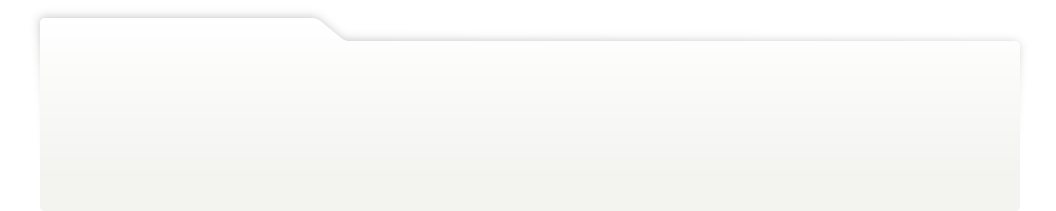
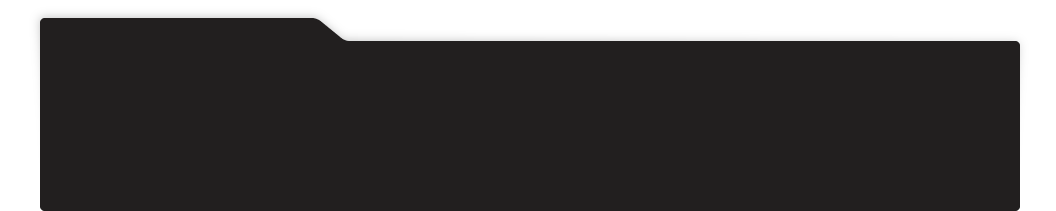
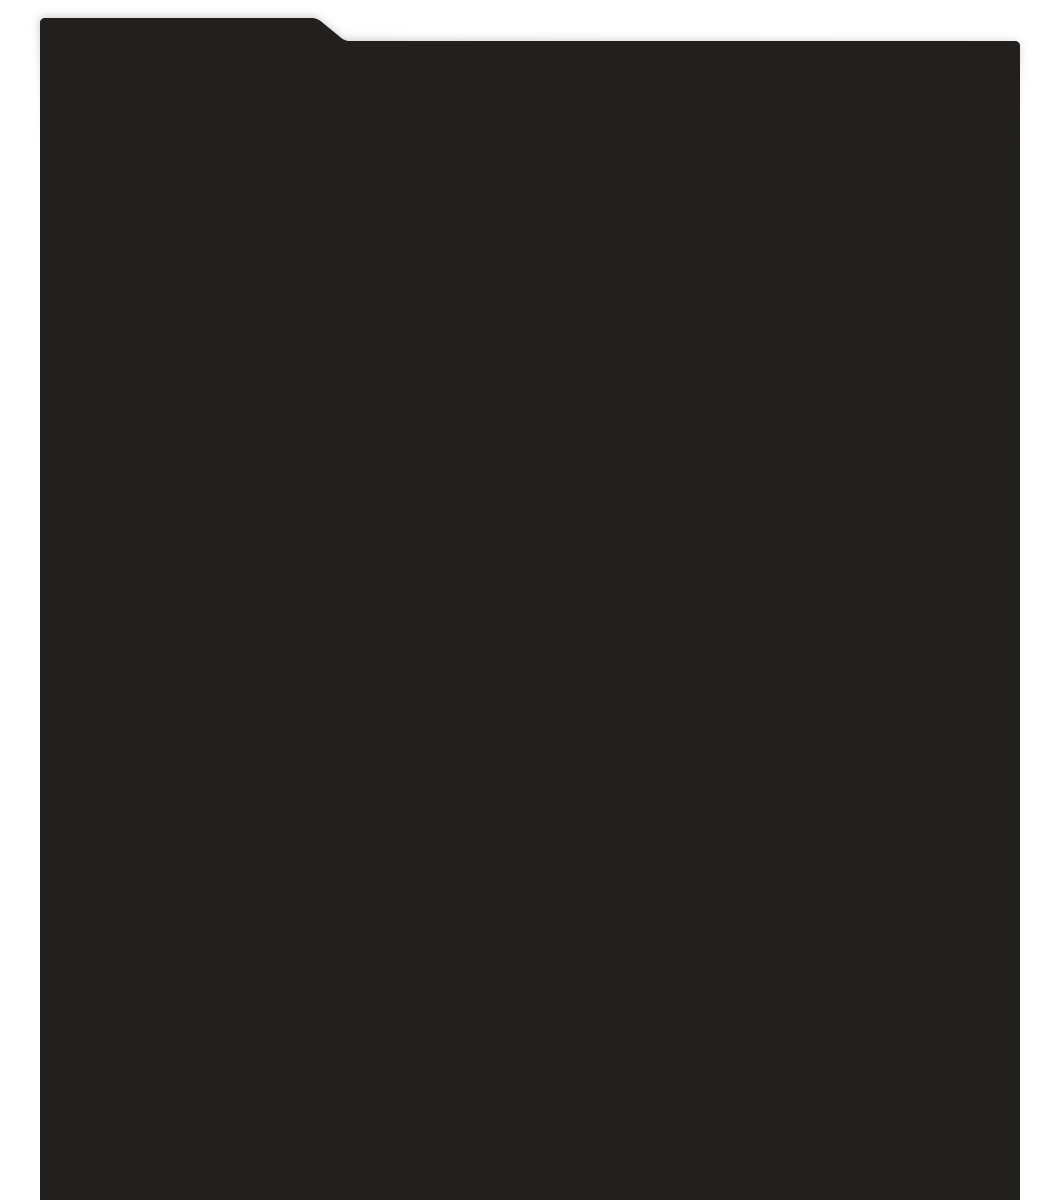
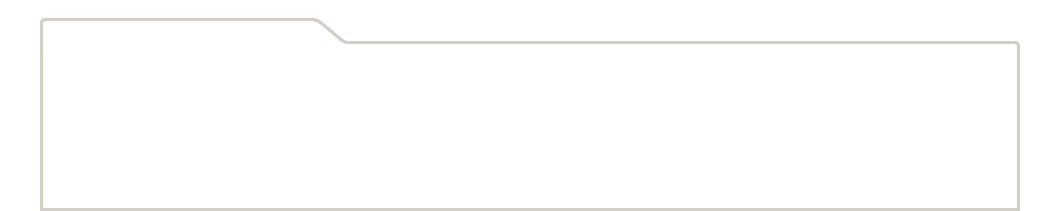
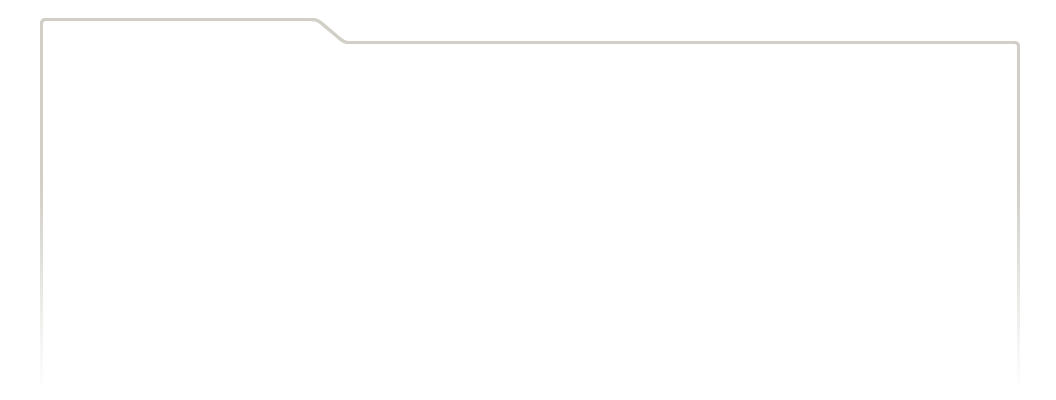
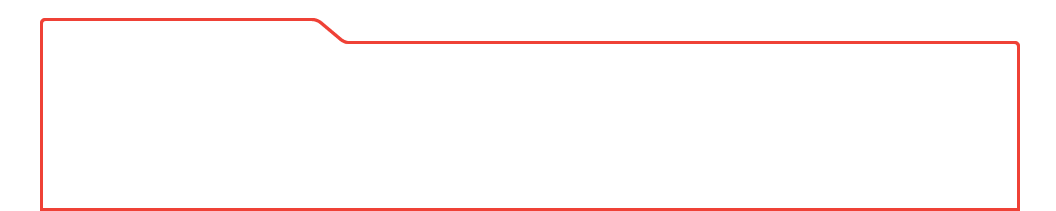
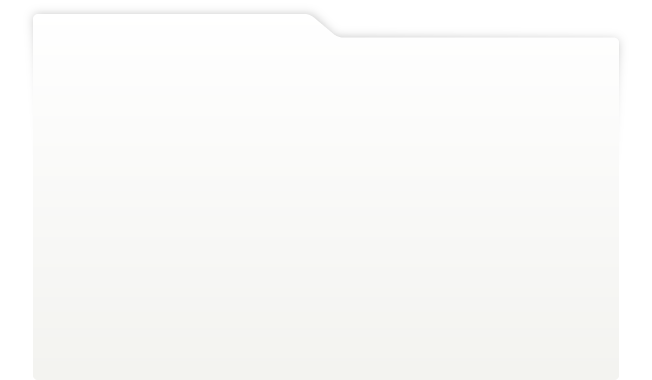
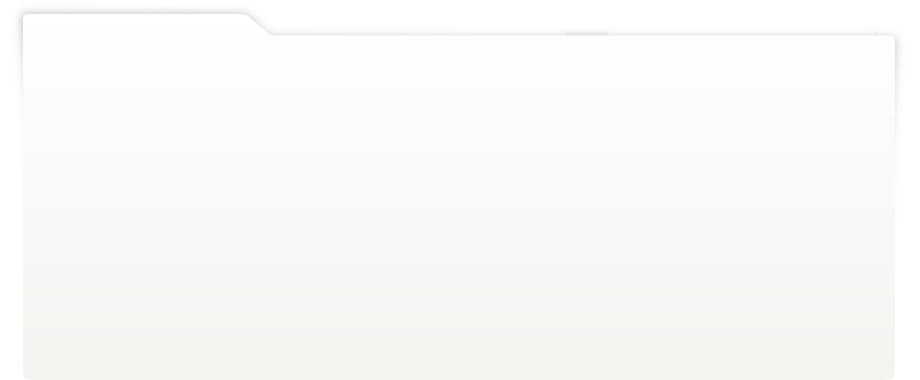
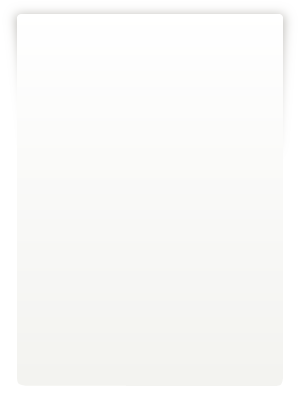
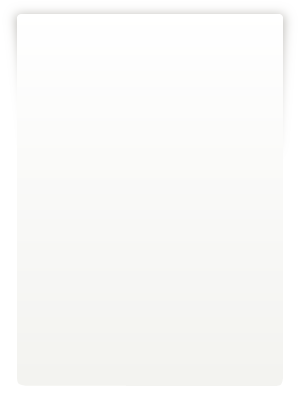
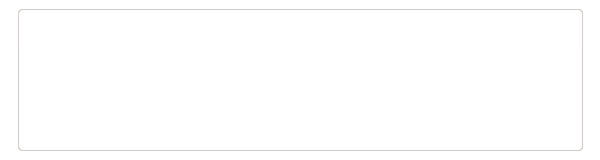
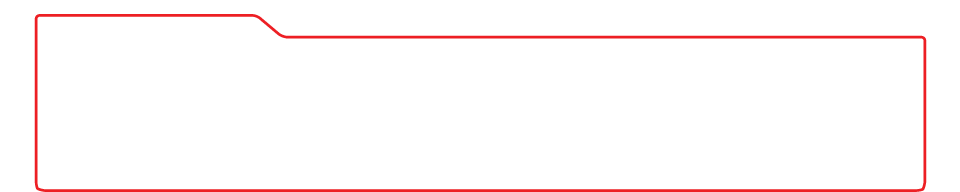
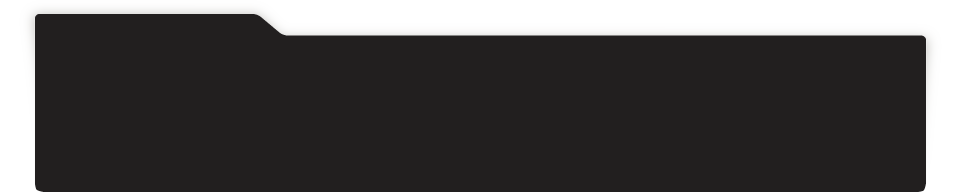
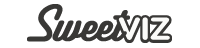
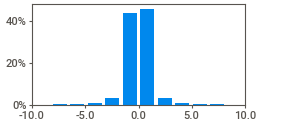
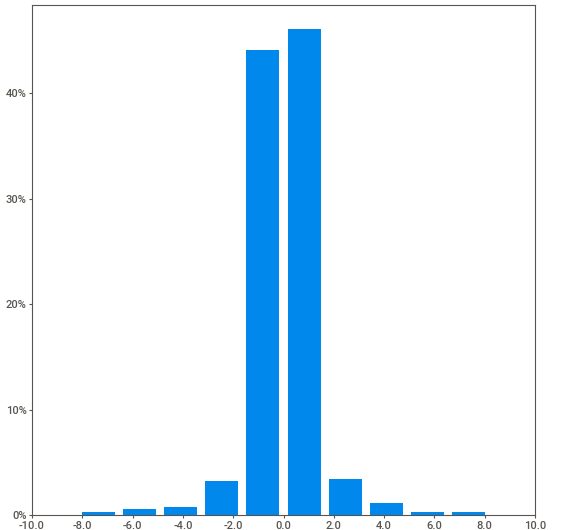
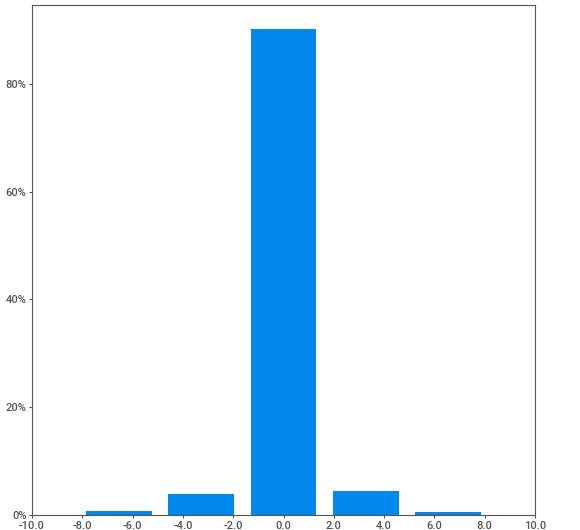
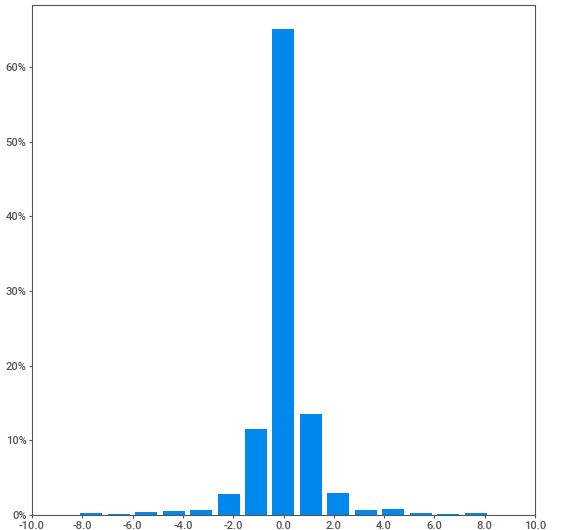
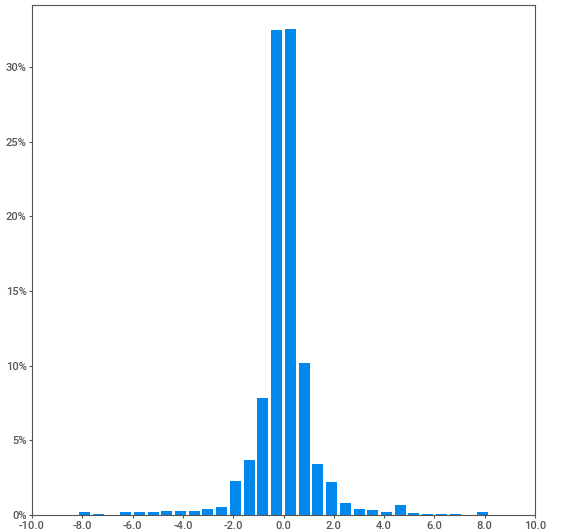
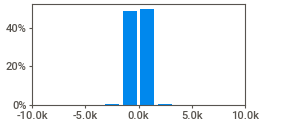
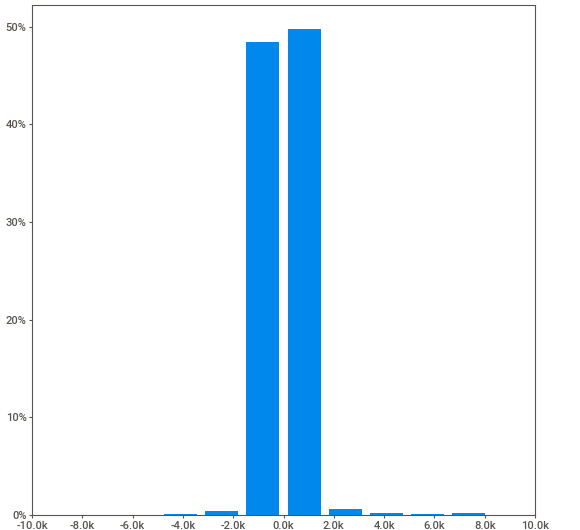
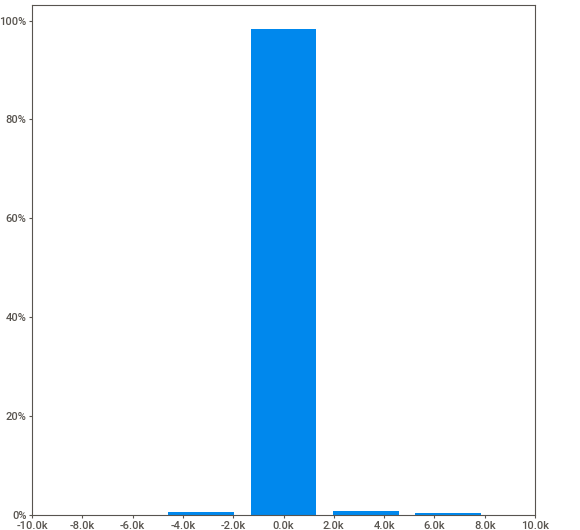
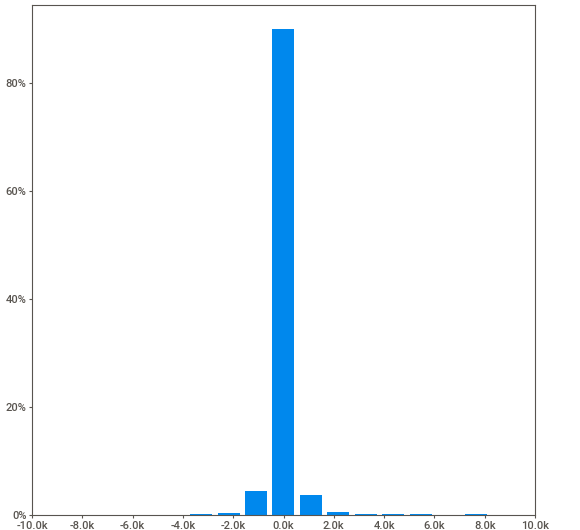
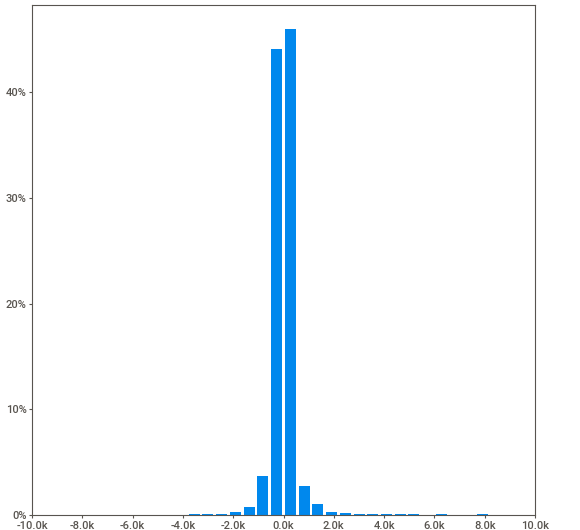
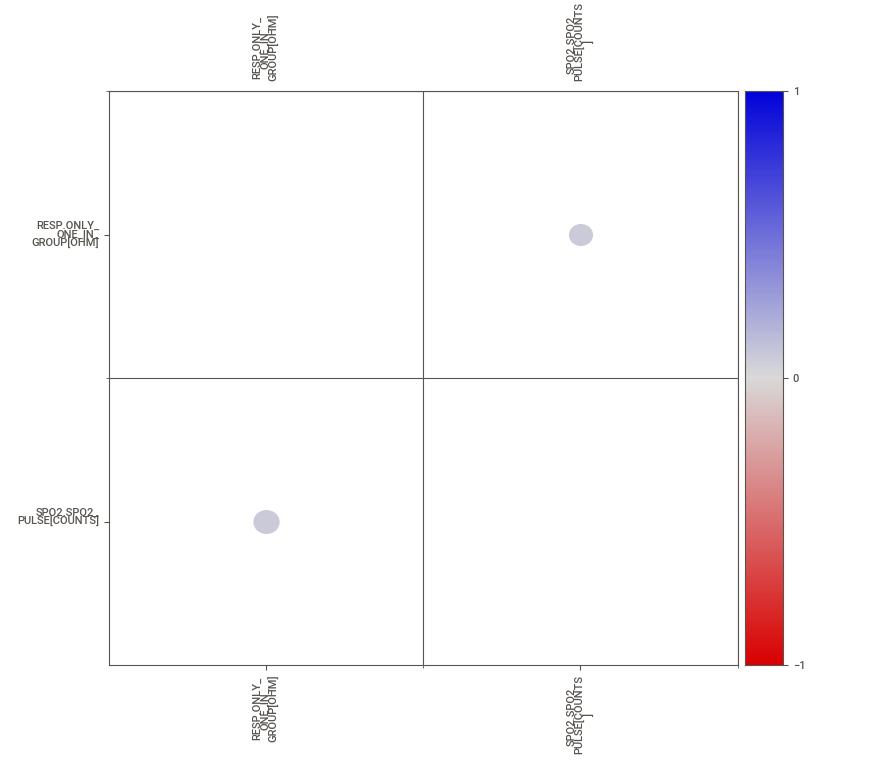
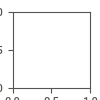

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)



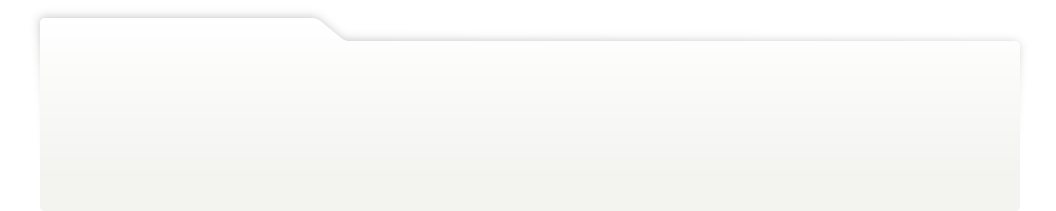
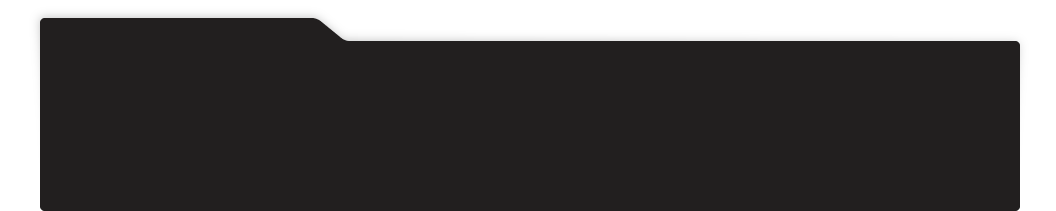
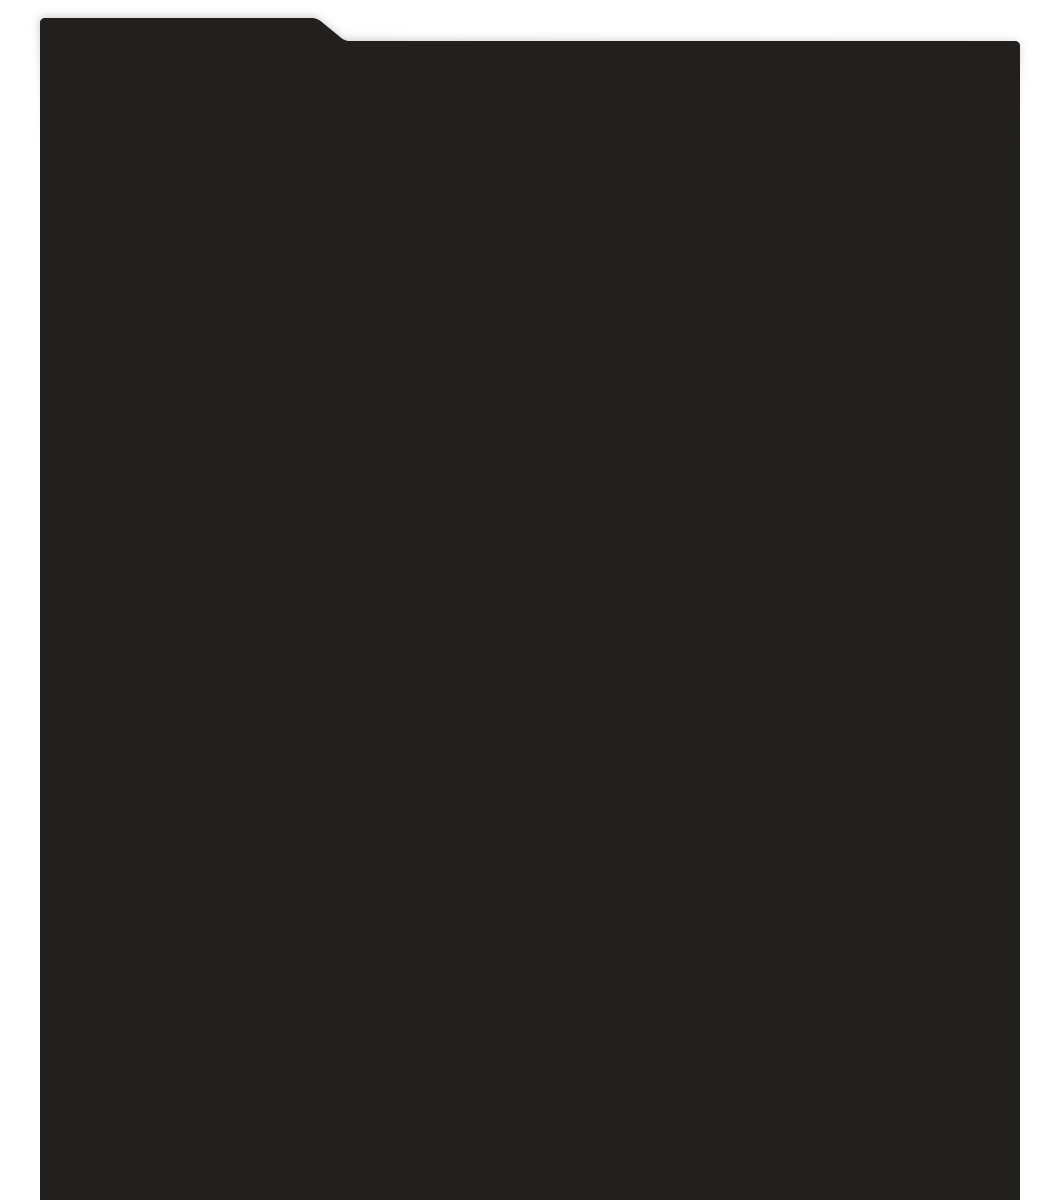
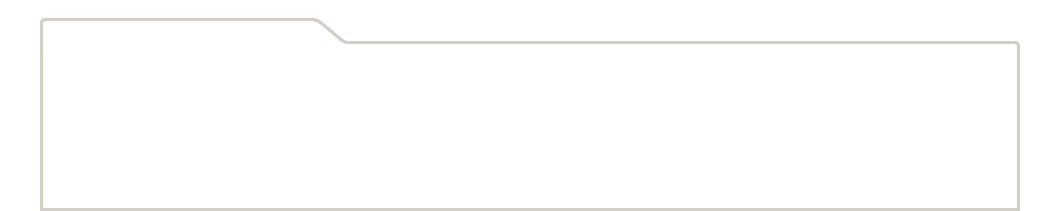
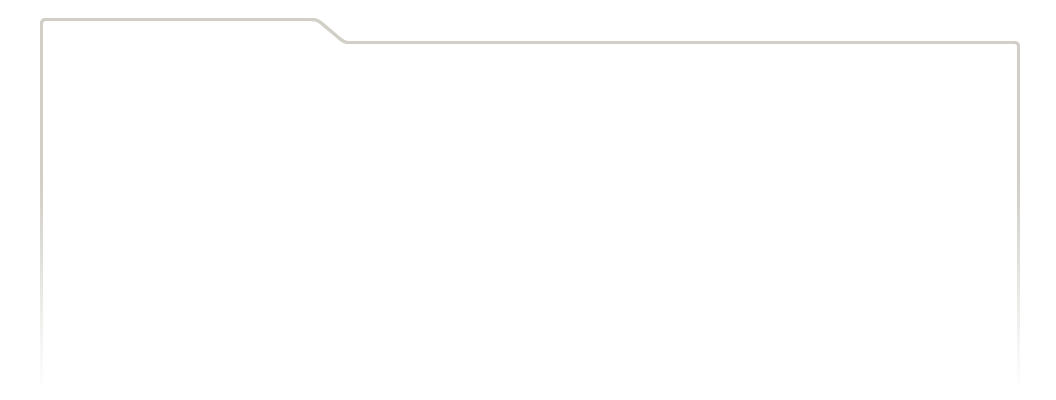
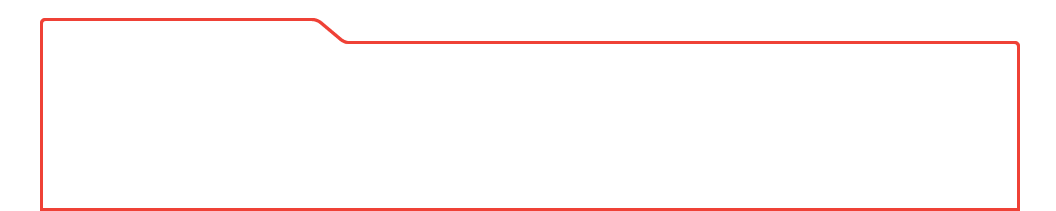
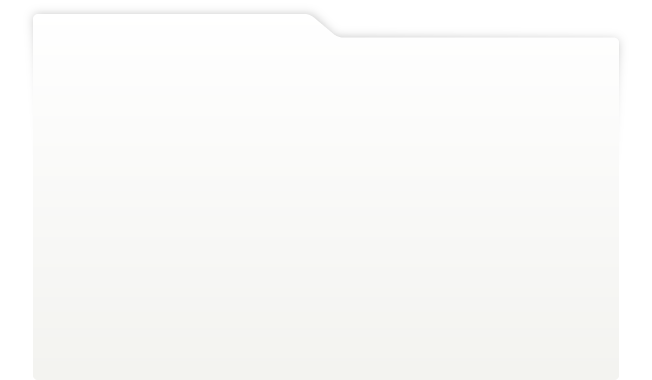
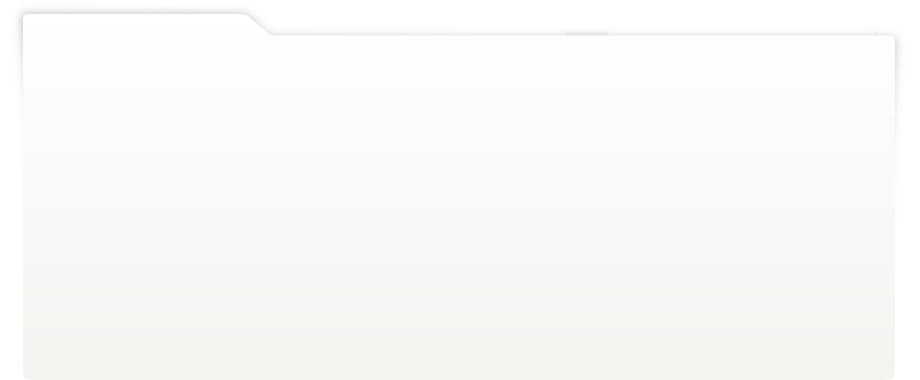
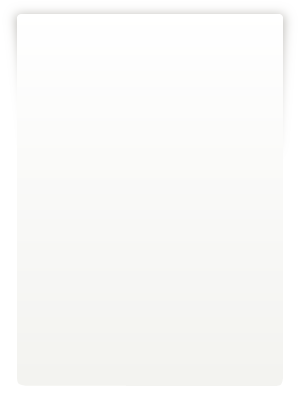
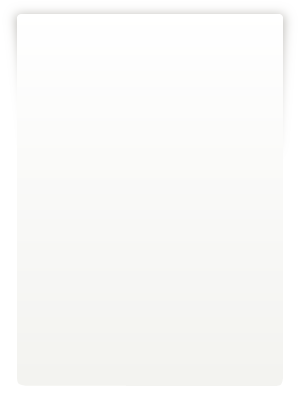
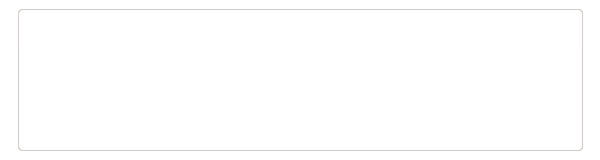
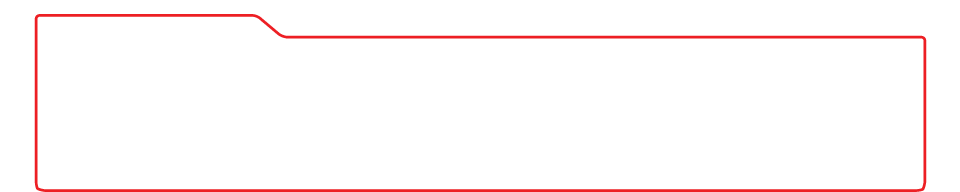
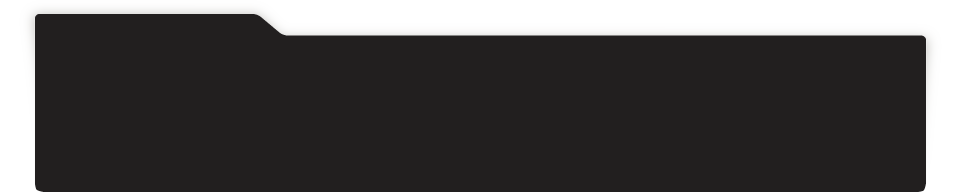
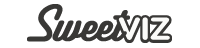
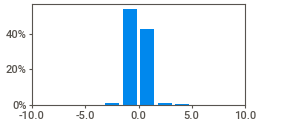
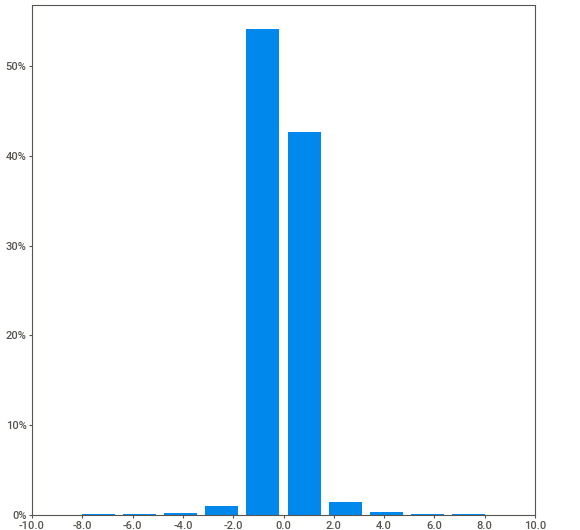
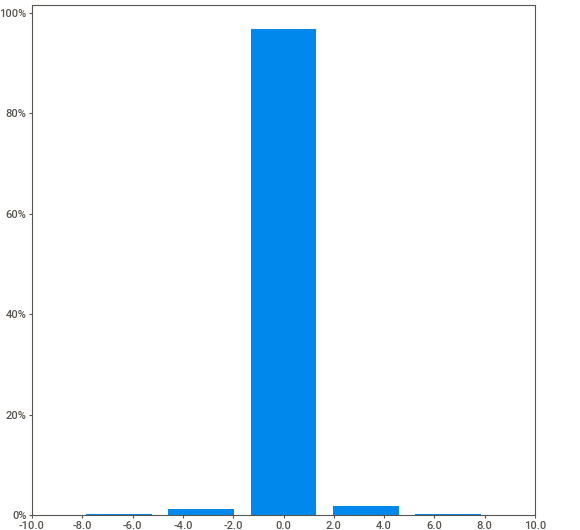
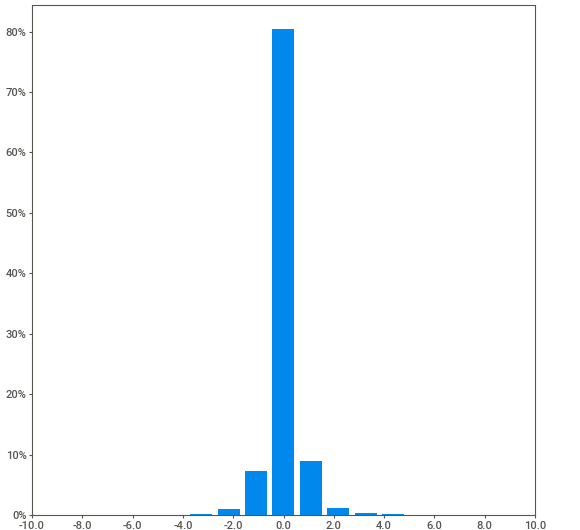
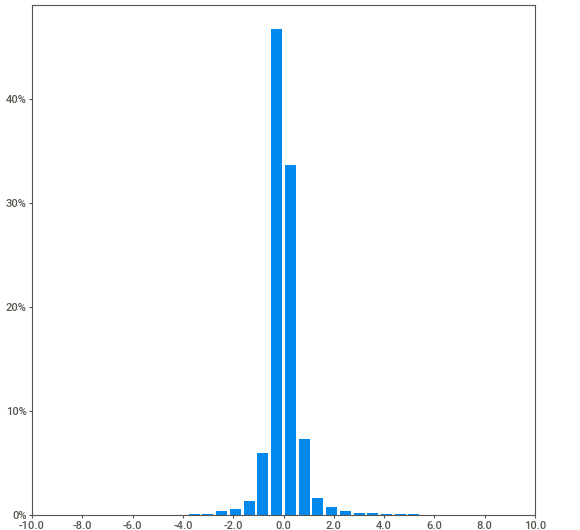
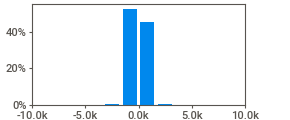
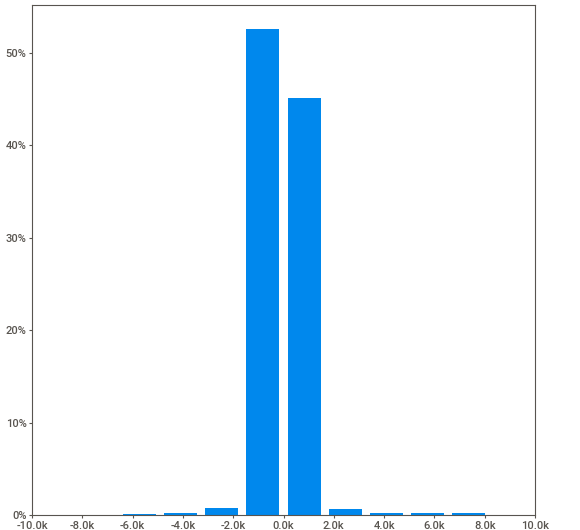
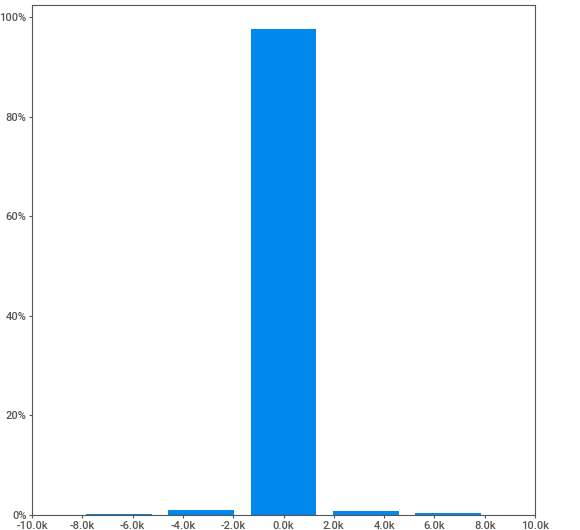
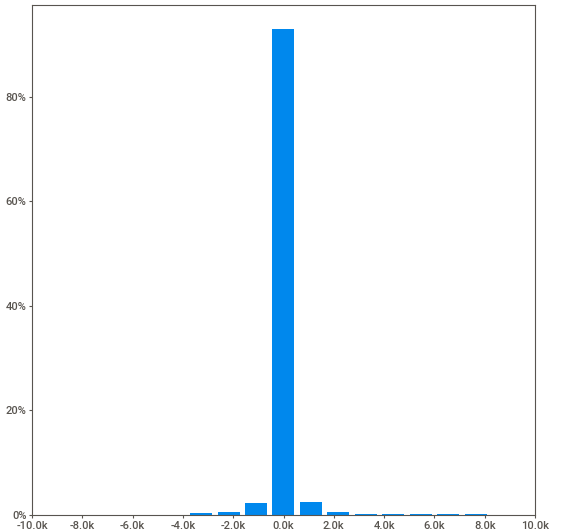
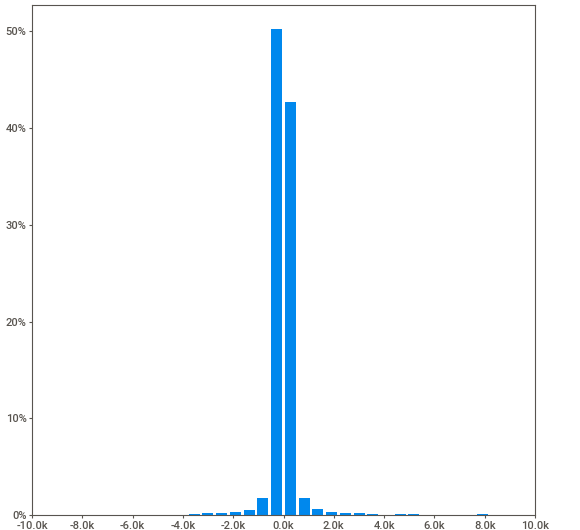
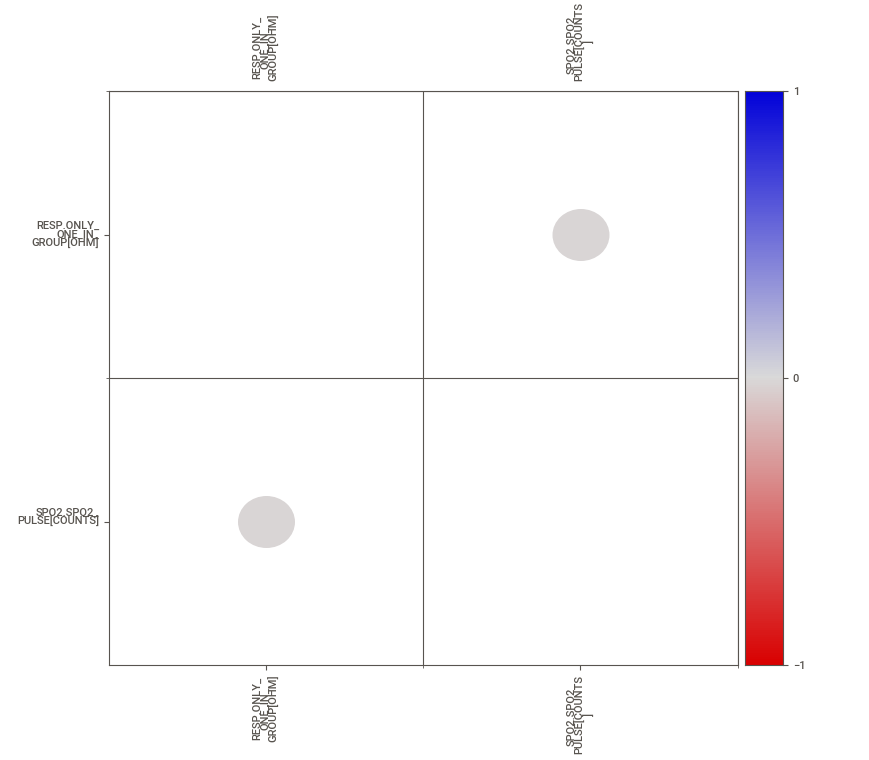
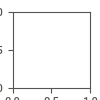

In [26]:
import sweetviz as sv
for i in range(len(data)):
    orig_data_report = sv.analyze(data[i], pairwise_analysis = 'on')
    orig_data_report.show_notebook()

# Data segmentation

import math
import numpy as np
np_data = FinalData.to_numpy()
labels = State.to_numpy()
labels.astype('int')
nb_timestamps, nb_sensors = np_data.shape
window_size = 100 # Size of the data segments, earlier there was the value of 60
timestamp_idx = 0 # Index along the timestamp dimension
segment_idx = 0 # Index for the segment dimension


nb_segments = int(math.floor(nb_timestamps/window_size))
print('Starting segmentation with a window size of %d resulting in %d segments ...' % (window_size,nb_segments))
data_to_save = np.zeros((nb_segments,window_size,nb_sensors),dtype=np.float32)
labels_to_save = np.zeros(nb_segments,dtype=int)

while segment_idx < nb_segments:
    data_to_save[segment_idx] = np_data[timestamp_idx:timestamp_idx+window_size,:]
    # Check the majority label ocurring in the considered window
    current_labels = labels[timestamp_idx:timestamp_idx+window_size]
    values, counts = np.unique(current_labels, return_counts=True)
    labels_to_save[segment_idx] = values[np.argmax(counts)]
    timestamp_idx += window_size
    segment_idx += 1

In [27]:
import math
import numpy as np

def segmentation(pd_data, shape):
    np_data = pd_data.to_numpy()
    nb_timestamps, nb_sensors = shape
    window_size = 100 # Size of the data segments, earlier there was the value of 60
    timestamp_idx = 0 # Index along the timestamp dimension
    segment_idx = 0 # Index for the segment dimension
    
    nb_segments = int(math.floor(nb_timestamps/window_size))
    print(f'Starting segmentation with a window size of {window_size} resulting in {nb_segments} segments.')
    data_to_save = np.zeros((nb_segments,window_size,nb_sensors),dtype=np.float32)

    while segment_idx < nb_segments:
        data_to_save[segment_idx] = np_data[timestamp_idx:timestamp_idx+window_size,:]
        timestamp_idx += window_size
        segment_idx += 1
    return data_to_save

To poniżej powinno być tablicą, a na razie nie jest - czyta na razie tylko wartość (chociaż nawet to nie), ale nigdzie ich nie zapisuje

In [28]:
position = []
for i in range(len(data)):
    shape = np.array(data[i]).shape
    print(shape)
    segmented = segmentation(data[i], shape)
    print(segmented)
    position.append(segmented)
    
    

(25198, 2)
Starting segmentation with a window size of 100 resulting in 251 segments.
[[[-1.84399998e+00  9.37000000e+02]
  [-1.71399999e+00 -6.10000000e+02]
  [ 7.23999977e-01  5.40000000e+01]
  ...
  [-2.08000004e-01  5.50000000e+01]
  [-4.92000014e-01 -1.65000000e+02]
  [ 4.19999994e-02 -1.90000000e+01]]

 [[-6.70000017e-02  9.90000000e+01]
  [-4.62000012e-01 -1.98000000e+02]
  [-5.55000007e-01 -1.44000000e+02]
  ...
  [ 1.22700000e+00  6.23000000e+02]
  [ 4.32999998e-01 -3.34000000e+02]
  [ 1.95000005e+00 -1.51000000e+02]]

 [[ 3.16000015e-01 -3.50000000e+01]
  [ 1.52199996e+00  6.90000000e+01]
  [ 2.02999994e-01  2.24000000e+02]
  ...
  [-1.72000006e-01  1.99000000e+02]
  [-2.70000011e-01 -1.86000000e+02]
  [ 1.53999999e-01 -1.04000000e+02]]

 ...

 [[ 9.14517045e-01  7.16051102e+01]
  [ 9.15363610e-01  7.19090881e+01]
  [ 9.16210234e-01  7.22130661e+01]
  ...
  [ 9.96636391e-01  1.01090912e+02]
  [ 9.97482955e-01  1.01394890e+02]
  [ 9.98329520e-01  1.01698860e+02]]

 [[ 9.991761

In [29]:
print(position[0][250][99])

[   4.441 -370.   ]


In [30]:
for i in range(len(position)):
    print(position[i].shape)

(251, 100, 2)
(258, 100, 2)


In [31]:
for i in range(len(position)):
    position[i]

In [32]:
position[1]

array([[[-1.5500000e-01, -4.5000000e+01],
        [-6.7000002e-02, -9.7000000e+01],
        [-1.4620000e+00,  1.7500000e+02],
        ...,
        [-4.8068967e-02,  1.7931034e+01],
        [-4.1000001e-02,  1.0000000e+01],
        [-3.3931036e-02,  2.0689654e+00]],

       [[-2.6862068e-02, -5.8620691e+00],
        [-1.9793103e-02, -1.3793103e+01],
        [-1.2724138e-02, -2.1724138e+01],
        ...,
        [-2.0100001e-01,  2.2100000e+02],
        [-8.2800001e-01, -4.5000000e+01],
        [ 1.3420000e+00, -4.1700000e+02]],

       [[ 5.4299998e-01, -5.1000000e+01],
        [-5.2399999e-01, -5.1000000e+01],
        [ 5.9500003e-01, -2.6100000e+02],
        ...,
        [ 3.9231384e-01, -6.0700000e+02],
        [ 3.9074469e-01, -6.8000000e+01],
        [ 3.8917553e-01, -7.7000000e+01]],

       ...,

       [[ 6.1999999e-02, -1.5160000e+03],
        [ 1.0060000e+00,  1.8000000e+02],
        [ 1.0800000e+00, -1.7000000e+01],
        ...,
        [-2.5999999e-01,  9.9000000e+01],
     

In [33]:
for i in range(len(position)):
    chunk_size = position[i].shape[1]
    print(chunk_size)

100
100


In [34]:
#old
'''
F = 200 # Data frequency of 200HZ
labels = []
def extract_features(data_to_save, chunk_size):
    num_chunks = data_to_save.shape[0]//chunk_size
    num_features = 6
    num_sensors = data_to_save.shape[2]
    features = np.zeros((num_chunks, num_features*num_sensors))
    for i in range(num_chunks):
        chunk = data_to_save[i*chunk_size:(i+1)*chunk_size, :, :]
        mean = np.mean(chunk, axis=(0, 1))
        median = np.median(chunk, axis=(0, 1))
        std = np.std(chunk, axis=(0, 1))
        min_val = np.min(chunk, axis=(0, 1))
        max_val = np.max(chunk, axis=(0, 1))
        #arg_max = np.argmax(chunk, axis=(0, 1))
        sum_val = np.sum(chunk, axis=(0, 1))/F
        features[i,:] = np.hstack([mean, median, std, min_val, max_val, sum_val]).reshape(1, num_features*num_sensors)
        labels[i] = labels_to_save[i]
    #features = features.reshape(num_chunks, num_features, num_sensors)
    return features
'''

'\nF = 200 # Data frequency of 200HZ\nlabels = []\ndef extract_features(data_to_save, chunk_size):\n    num_chunks = data_to_save.shape[0]//chunk_size\n    num_features = 6\n    num_sensors = data_to_save.shape[2]\n    features = np.zeros((num_chunks, num_features*num_sensors))\n    for i in range(num_chunks):\n        chunk = data_to_save[i*chunk_size:(i+1)*chunk_size, :, :]\n        mean = np.mean(chunk, axis=(0, 1))\n        median = np.median(chunk, axis=(0, 1))\n        std = np.std(chunk, axis=(0, 1))\n        min_val = np.min(chunk, axis=(0, 1))\n        max_val = np.max(chunk, axis=(0, 1))\n        #arg_max = np.argmax(chunk, axis=(0, 1))\n        sum_val = np.sum(chunk, axis=(0, 1))/F\n        features[i,:] = np.hstack([mean, median, std, min_val, max_val, sum_val]).reshape(1, num_features*num_sensors)\n        labels[i] = labels_to_save[i]\n    #features = features.reshape(num_chunks, num_features, num_sensors)\n    return features\n'

# Saving array for further processing

In [35]:
data_to_save_copy = position.copy()

In [36]:
#from numba import cuda
import scipy
from scipy.stats import kurtosis, skew

# Feature extraction

In [37]:
global num_features
num_features = 9

def extract_features(extracted_data, chunk_size = position[0].shape[1]):
    freq = 100 # Data frequency of 200HZ
    num_chunks = extracted_data.shape[0]//chunk_size
    #global num_features
    #num_features = 8
    num_sensors = extracted_data.shape[2]
    features = np.zeros((num_chunks, num_features*num_sensors))
    
    
    positive = 0
    negative = 0
    
    
    for i in range(num_chunks):
        chunk = extracted_data[i*chunk_size:(i+1)*chunk_size, :, :]
        mean = np.mean(chunk, axis=(0, 1))
        median = np.median(chunk, axis=(0, 1))
        std = np.std(chunk, axis=(0, 1))
        min_val = np.min(chunk, axis=(0, 1))
        max_val = np.max(chunk, axis=(0, 1))
        sum_val = np.sum(chunk, axis=(0, 1))/freq
        fft_sum_list = []
                    # Perform FFT on the chunk of data
        #argmax_list = []
        
        
        
        fft_argmax_list = []
        fft_sum_list_1 = []
        row_fft = [np.array([]) for _ in range(num_sensors)]
        '''

    
        fft_vals_1 = np.fft.fft(chunk[i,])
        print(fft_vals_1)
        fft_sum_1 = np.sum(np.abs(fft_vals_1))/freq
                #print(fft_sum)
                #print('The value of fft_sum: ', fft_sum)
    
            #print(fft_vals_1[:,0])    
            #print(fft_vals_1[1,:])
    
            #print(fft_vals_1[i], end = '\n')
            #print('\n')
        fft_sum_list_1.append(fft_sum_1)
        argmax_1 = np.argmax(fft_vals_1[i])
            #print(argmax_1)
            #print(fft_vals_1[argmax_1, i], end = '\n')
                #print(fft_vals[argmax, j], end = '\n')
            #print('\n')
        
        #row_fft[0] = np.append(row_fft[0], fft_vals_1[:,0])
        #row_fft[1] = np.append(row_fft[1], fft_vals_1[:,1])
        '''
        ###################################################################
        for j in range(num_sensors):
            kurtosis = scipy.stats.kurtosis(chunk[j,])
            skew = scipy.stats.skew(chunk[j,])
            
            
            fft_vals = np.fft.fft(chunk[j,])
            #print(fft_vals)
            fft_sum = np.sum(np.abs(fft_vals))/freq
            #print(fft_sum)
            #print('The value of fft_sum: ', fft_sum)
    
        
        #print(fft_vals_1[i], end = '\n')
        #print('\n')
            fft_sum_list.append(fft_sum)
            #argmax_1 = np.argmax(fft_vals_1[j])
            
        #print(fft_vals[:,0])    
        #print(fft_vals[1,:])
        positive_count = np.count_nonzero(fft_vals > 0)
        negative_count = np.count_nonzero(fft_vals < 0)
        positive += positive_count
        negative += negative_count
        #print("Number of positive values:", positive_count)
        #print("Number of negative values:", negative_count)
        
        '''
        fft_vals = np.fft.fft(chunk[j,])
        fft_sum = np.sum(np.abs(fft_vals))/freq
        #print(fft_sum)
        #print('The value of fft_sum: ', fft_sum)
        print(fft_vals, end = '\n')
        print('\n')
        fft_sum_list.append(fft_sum)
        argmax = np.argmax(fft_vals)
        print(argmax)
        print(fft_vals[argmax], end = '\n')
        #print(fft_vals[argmax, j], end = '\n')
        print('\n')
        #if (fft_vals[argmax] > 0):
        #    fft_argmax_list.append(fft_vals[argmax])
        '''     
        #print(row_fft[0])
            #print(row_fft[1])       
            
            #val_for_argmax = fft_vals[argmax]
                        #fft_argmax_list.append(argmax_test)
                        #print(argmax_test)
                        #argmax = np.argmax(chunk[j,])
                        #argmax_list.append(argmax)
        #print("fft_argmax_list", fft_argmax_list)
        #print("Argmax list", argmax_list)
        fft_sum_list = np.array(fft_sum_list)
        #####print(fft_sum_list)    
        #print(fft_argmax_list)
        features[i,:] = np.concatenate([mean, median, std, min_val, max_val, sum_val, kurtosis, skew, fft_sum_list])
        global feature_names
        feature_names = ['mean', 'mean_2', 'median', 'median_2', 'std', 'std_2', 'min_val', 'min_val_2',\
            'max_val', 'max_val_2', 'sum_val', 'sum_val_2', 'kurtosis', 'kurtosis_2', 'skew', 'skew_2', 'fft_sum', 'fft_sum_2']
    print(f'total positive values for position {positive}')
    print(f'total negative values for position {negative}')        
    return features

####

#Uwaga obie wartości fft_sum dla obydwu czujników dopisywane są na sam koniec tablicy, jedna po drugiej!!


####

# Number of samples
#N = new_array.shape[0]

# Compute the frequencies in Hz for the power spectrum
#frequencies = np.fft.fftfreq(N, 1/sampling_rate)

In [38]:
global num_features
num_features = 9

def extract_features2(extracted_data, chunk_size = position[0].shape[1]):
    freq = 100 # Data frequency of 200HZ
    num_chunks = extracted_data.shape[0]//chunk_size

    num_sensors = extracted_data.shape[2]
    features = np.zeros((num_chunks, num_features*num_sensors))
    
    
    positive = 0
    negative = 0
    
    
    for i in range(num_chunks):
        chunk = extracted_data[i*chunk_size:(i+1)*chunk_size, :, :]
 
        fft_argmax_list = []
        fft_sum_list_1 = []
        row_fft = [np.array([]) for _ in range(num_sensors)]

        for j in range(num_sensors):
            kurtosis = scipy.stats.kurtosis(chunk[j,])
            skew = scipy.stats.skew(chunk[j,])
            
            
            fft_vals = np.fft.fft(chunk[j,])

            fft_sum = np.sum(np.abs(fft_vals))/freq

            fft_sum_list.append(fft_sum)

        #print(fft_vals[:,0])    
        #print(fft_vals[1,:])
        positive_count = np.count_nonzero(fft_vals > 0)
        negative_count = np.count_nonzero(fft_vals < 0)
        positive += positive_count
        negative += negative_count

        #print("Number of negative values:", negative_count)
       
        fft_sum_list = np.array(fft_sum_list)

        features[i,:] = np.concatenate([kurtosis, skew, fft_sum_list])
        global feature_names
        feature_names = ['mean', 'mean_2', 'median', 'median_2', 'std', 'std_2', 'min_val', 'min_val_2',\
            'max_val', 'max_val_2', 'sum_val', 'sum_val_2', 'kurtosis', 'kurtosis_2', 'skew', 'skew_2', 'fft_sum', 'fft_sum_2']
    print(f'total positive values for position {positive}')
    print(f'total negative values for position {negative}')        
    return features

####

#Uwaga obie wartości fft_sum dla obydwu czujników dopisywane są na sam koniec tablicy, jedna po drugiej!!


####

# Number of samples
#N = new_array.shape[0]

# Compute the frequencies in Hz for the power spectrum
#frequencies = np.fft.fftfreq(N, 1/sampling_rate)

In [70]:
#extract_features(position[0])


for i in range(len(position)):
        print('Position %d' % i)
        extract_features(position[i])
        x = extract_features(position[i])
        print(x)
        print(x.shape)

Position 0
total positive values for position 200
total negative values for position 200
total positive values for position 200
total negative values for position 200
[[-1.76954538e-01 -5.78930998e+00 -2.11267881e-02  5.58787870e+00
   1.15637577e+00  5.39939331e+02 -8.19200039e+00 -8.19200000e+03
   8.19099998e+00  8.19100000e+03 -1.76954536e+01 -5.78930969e+02
   6.06076431e+00  1.15790977e+01  1.73759878e+00 -6.10894322e-01
   4.90703320e+02  3.47180000e+02]
 [ 6.61005452e-02  3.09871063e+01  1.39072444e-02 -1.90000000e+01
   9.63665783e-01  7.59964111e+02 -8.19200039e+00 -8.19200000e+03
   8.19099998e+00  8.19100000e+03  6.61005449e+00  3.09871069e+03
  -1.20023918e+00  4.05596256e-01  1.49796104e-08  1.27849352e+00
   4.47540148e+02  4.34188029e+02]]
(2, 18)
Position 1
total positive values for position 199
total negative values for position 201
total positive values for position 199
total negative values for position 201
[[-2.77535096e-02  7.10995102e+00 -7.50000030e-02 -1.004904

def extract_features(data_to_save, chunk_size):
    num_chunks = data_to_save.shape[0]//chunk_size
    num_features = 4
    num_sensors = data_to_save.shape[2]
    features = np.zeros((num_chunks, num_features*num_sensors))
    for i in range(num_chunks):
        chunk = data_to_save[i*chunk_size:(i+1)*chunk_size, :, :]
        mean = np.mean(chunk, axis=(0, 1))
        median = np.median(chunk, axis=(0, 1))
        std = np.std(chunk, axis=(0, 1))
        min_val = np.min(chunk, axis=(0, 1))
        #arg_max = np.argmax(chunk, axis=(0, 1))
        features[i,:] = np.hstack([mean, median, std, min_val]).flatten()
    features = features.reshape(num_chunks, num_features, num_sensors)
    return features


In [40]:
def labeling():
    extracted_features = []
    for i in range(len(position)):
        extracted_features.append(extract_features(position[i]))
        #print(extracted_features)
    
    position_0 = extract_features(position[0])
    position_1 = extract_features(position[1])
    
    labels_0 = np.zeros(position_0.shape[0])
    labels_1 = np.ones(position_1.shape[0])
    
    complete_feature_dataset = np.concatenate((position_0,position_1))
    complete_label_dataset = np.concatenate((labels_0, labels_1))
    
    return complete_feature_dataset, complete_label_dataset

In [41]:
#len(extracted_features)

In [42]:
#position_0 = extract_features(position[0])
#position_1 = extract_features(position[1])

In [43]:
#position_0.size
#position_0.shape

In [44]:
#labels_0 = np.zeros(position_0.shape[0])
#labels_1 = np.ones(position_1.shape[0])

In [45]:
#complete_feature_dataset = np.concatenate((position_0,position_1))

In [46]:
#complete_label_dataset = np.concatenate((labels_0, labels_1))

In [47]:
#complete_feature_dataset.shape

In [48]:
#complete_label_dataset.shape

In [49]:
#complete_label_dataset

#labels = np.squeeze(labels)

#%debug

In [50]:
#new_array = new_array.flatten()

In [51]:
#new_array

In [52]:
#set(labels_to_save)

In [53]:
#labels_to_save

###Creating an additional table called Saved_data for further actions

In [54]:
#Saved_data = complete_feature_dataset

In [55]:
#Saved_data.shape

In [56]:
#data_to_save = np.array(data_to_save) # this is the 3D array
#data_to_save = data_to_save.reshape(data_to_save.shape[0], -1) # reshape to 2D array

## Data shuffling

In [57]:
#labels_to_save = labels
#labels_to_save.shape

In [58]:
from sklearn.preprocessing import LabelEncoder
def data_shuffling():
    dataset = labeling()
    shuffler = np.random.permutation(len(dataset[0]))
    X = dataset[0][shuffler]
    y = dataset[1][shuffler]

    return X,y
#le = LabelEncoder()
#y = le.fit_transform(y)

In [59]:
#data_shuffling()

# Recursive feature elimination

In [60]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification

In [61]:
'''
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, 6)
fit = rfe.fit(X, y)


# summarize the selection of the attributes
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
'''

'\nmodel = LogisticRegression(max_iter=1000)\nrfe = RFE(model, 6)\nfit = rfe.fit(X, y)\n\n\n# summarize the selection of the attributes\nprint("Selected Features: %s" % fit.support_)\nprint("Feature Ranking: %s" % fit.ranking_)\n'

In [62]:
'''
model = RandomForestClassifier()
rfe = RFE(model, 6)
fit = rfe.fit(X, y)


# summarize the selection of the attributes
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
'''

'\nmodel = RandomForestClassifier()\nrfe = RFE(model, 6)\nfit = rfe.fit(X, y)\n\n\n# summarize the selection of the attributes\nprint("Selected Features: %s" % fit.support_)\nprint("Feature Ranking: %s" % fit.ranking_)\n'

In [63]:
'''
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.datasets import load_digits

# create the RFE model and select 6 attributes
svm = SVC(kernel="linear", C=1)
rfe = RFE(svm, 6)
fit = rfe.fit(X, y)

# summarize the selection of the attributes
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
'''

'\nfrom sklearn.feature_selection import RFE\nfrom sklearn.svm import SVC\nfrom sklearn.datasets import load_digits\n\n# create the RFE model and select 6 attributes\nsvm = SVC(kernel="linear", C=1)\nrfe = RFE(svm, 6)\nfit = rfe.fit(X, y)\n\n# summarize the selection of the attributes\nprint("Selected Features: %s" % fit.support_)\nprint("Feature Ranking: %s" % fit.ranking_)\n'

In [64]:
'''
#models = [LogisticRegression(solver='liblinear', max_iter=1000), SVC(kernel='linear'), RandomForestClassifier()]
models = [LogisticRegression(solver='liblinear', max_iter=1000), RandomForestClassifier()]

for model in models:
    rfe = RFE(model, n_features_to_select=6)
    cv_scores = cross_val_score(rfe, X, y, cv=5)
    print("Model:", model.__class__.__name__)
    print("Selected Features:", rfe.fit(X, y).support_)
    print("CV Scores:", cv_scores)
    print("Mean CV Score:", cv_scores.mean())
    
'''

'\n#models = [LogisticRegression(solver=\'liblinear\', max_iter=1000), SVC(kernel=\'linear\'), RandomForestClassifier()]\nmodels = [LogisticRegression(solver=\'liblinear\', max_iter=1000), RandomForestClassifier()]\n\nfor model in models:\n    rfe = RFE(model, n_features_to_select=6)\n    cv_scores = cross_val_score(rfe, X, y, cv=5)\n    print("Model:", model.__class__.__name__)\n    print("Selected Features:", rfe.fit(X, y).support_)\n    print("CV Scores:", cv_scores)\n    print("Mean CV Score:", cv_scores.mean())\n    \n'

In [65]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_absolute_error

In [66]:
def feature_elimination(n = i):
    # Create the Random Forest classifier
    rf = RandomForestClassifier()

    # Perform feature selection using RFE
    rfe = RFE(estimator=rf, n_features_to_select=n, step=1)
    shuffled_dataset = data_shuffling()
    X = shuffled_dataset[0]
    y = shuffled_dataset[1]
    rfe.fit(X, y)

    # Get the selected feature indices
    selected_features = rfe.support_
    selected_features_indices = np.where(selected_features)[0]
    print(selected_features_indices)
    print('Number of features selected: %d' % (n))
    
    names_selected_features = []
    '''
    for i in range(len(selected_features_indices)):
        if (selected_features_indices == feature_names[i]):
            names_selected_features.concatenate()
    print(feature_names)
    '''
    for i in selected_features_indices:
        names_selected_features.append(feature_names[i])
    #print(feature_names)
    print(names_selected_features)
    
    le = LabelEncoder()
    y = le.fit_transform(y)
    # Use the selected features to train and evaluate the classifier
    global X_selected
    X_selected = X[:, selected_features]
    global X_train, X_test, y_train, y_test
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

    
    
    # Train the Random Forest classifier
    rf.fit(X_train, y_train)

    # Evaluate the classifier
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    mae = mean_absolute_error(y_test, y_pred)

    print("Accuracy: %.4f%%" % (accuracy * 100.0))
    print("Precision: %.4f%%" % (precision * 100.0))
    print("Recall: %.4f%%" % (recall * 100.0))
    print("Mean Absolute Error:", mae, end = '\n')

In [67]:
#def xyz():
for i in range(num_features*2,0,-1):
    feature_elimination(i)

total positive values for position 200
total negative values for position 200
total positive values for position 199
total negative values for position 201
total positive values for position 200
total negative values for position 200
total positive values for position 199
total negative values for position 201
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
Number of features selected: 18
['mean', 'mean_2', 'median', 'median_2', 'std', 'std_2', 'min_val', 'min_val_2', 'max_val', 'max_val_2', 'sum_val', 'sum_val_2', 'kurtosis', 'kurtosis_2', 'skew', 'skew_2', 'fft_sum', 'fft_sum_2']
Accuracy: 50.0000%
Precision: 25.0000%
Recall: 50.0000%
Mean Absolute Error: 0.5
total positive values for position 200
total negative values for position 200
total positive values for position 199
total negative values for position 201
total positive values for position 200
total negative values for position 200
total positive values for position 199
total negative values for position 201


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17]
Number of features selected: 17
['mean', 'mean_2', 'median', 'median_2', 'std', 'std_2', 'min_val', 'min_val_2', 'max_val_2', 'sum_val', 'sum_val_2', 'kurtosis', 'kurtosis_2', 'skew', 'skew_2', 'fft_sum', 'fft_sum_2']
Accuracy: 50.0000%
Precision: 25.0000%
Recall: 50.0000%
Mean Absolute Error: 0.5
total positive values for position 200
total negative values for position 200
total positive values for position 199
total negative values for position 201
total positive values for position 200
total negative values for position 200
total positive values for position 199
total negative values for position 201


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[ 0  1  2  3  4  5  6  8 10 11 12 13 14 15 16 17]
Number of features selected: 16
['mean', 'mean_2', 'median', 'median_2', 'std', 'std_2', 'min_val', 'max_val', 'sum_val', 'sum_val_2', 'kurtosis', 'kurtosis_2', 'skew', 'skew_2', 'fft_sum', 'fft_sum_2']
Accuracy: 0.0000%
Precision: 0.0000%
Recall: 0.0000%
Mean Absolute Error: 1.0
total positive values for position 200
total negative values for position 200
total positive values for position 199
total negative values for position 201
total positive values for position 200
total negative values for position 200
total positive values for position 199
total negative values for position 201
[ 0  1  2  3  4  5  6 10 11 12 13 14 15 16 17]
Number of features selected: 15
['mean', 'mean_2', 'median', 'median_2', 'std', 'std_2', 'min_val', 'sum_val', 'sum_val_2', 'kurtosis', 'kurtosis_2', 'skew', 'skew_2', 'fft_sum', 'fft_sum_2']
Accuracy: 50.0000%
Precision: 25.0000%
Recall: 50.0000%
Mean Absolute Error: 0.5
total positive values for position 20

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[ 0  1  2  3  4  5  6 10 11 12 13 14 15 16]
Number of features selected: 14
['mean', 'mean_2', 'median', 'median_2', 'std', 'std_2', 'min_val', 'sum_val', 'sum_val_2', 'kurtosis', 'kurtosis_2', 'skew', 'skew_2', 'fft_sum']
Accuracy: 100.0000%
Precision: 100.0000%
Recall: 100.0000%
Mean Absolute Error: 0.0
total positive values for position 200
total negative values for position 200
total positive values for position 199
total negative values for position 201
total positive values for position 200
total negative values for position 200
total positive values for position 199
total negative values for position 201
[ 0  2  4  5  6 10 11 12 13 14 15 16 17]
Number of features selected: 13
['mean', 'median', 'std', 'std_2', 'min_val', 'sum_val', 'sum_val_2', 'kurtosis', 'kurtosis_2', 'skew', 'skew_2', 'fft_sum', 'fft_sum_2']
Accuracy: 50.0000%
Precision: 25.0000%
Recall: 50.0000%
Mean Absolute Error: 0.5
total positive values for position 200
total negative values for position 200
total posit

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[ 0  1  3  4  5  6 12 13 14 15 16 17]
Number of features selected: 12
['mean', 'mean_2', 'median_2', 'std', 'std_2', 'min_val', 'kurtosis', 'kurtosis_2', 'skew', 'skew_2', 'fft_sum', 'fft_sum_2']
Accuracy: 0.0000%
Precision: 0.0000%
Recall: 0.0000%
Mean Absolute Error: 1.0
total positive values for position 200
total negative values for position 200
total positive values for position 199
total negative values for position 201
total positive values for position 200
total negative values for position 200
total positive values for position 199
total negative values for position 201


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[ 1  2  4  6 10 12 13 14 15 16 17]
Number of features selected: 11
['mean_2', 'median', 'std', 'min_val', 'sum_val', 'kurtosis', 'kurtosis_2', 'skew', 'skew_2', 'fft_sum', 'fft_sum_2']
Accuracy: 50.0000%
Precision: 25.0000%
Recall: 50.0000%
Mean Absolute Error: 0.5
total positive values for position 200
total negative values for position 200
total positive values for position 199
total negative values for position 201
total positive values for position 200
total negative values for position 200
total positive values for position 199
total negative values for position 201


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[ 1  4  6 10 11 12 14 15 16 17]
Number of features selected: 10
['mean_2', 'std', 'min_val', 'sum_val', 'sum_val_2', 'kurtosis', 'skew', 'skew_2', 'fft_sum', 'fft_sum_2']
Accuracy: 50.0000%
Precision: 25.0000%
Recall: 50.0000%
Mean Absolute Error: 0.5
total positive values for position 200
total negative values for position 200
total positive values for position 199
total negative values for position 201
total positive values for position 200
total negative values for position 200
total positive values for position 199
total negative values for position 201


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[ 2  3  4  5  6 12 13 15 16]
Number of features selected: 9
['median', 'median_2', 'std', 'std_2', 'min_val', 'kurtosis', 'kurtosis_2', 'skew_2', 'fft_sum']
Accuracy: 50.0000%
Precision: 25.0000%
Recall: 50.0000%
Mean Absolute Error: 0.5
total positive values for position 200
total negative values for position 200
total positive values for position 199
total negative values for position 201
total positive values for position 200
total negative values for position 200
total positive values for position 199
total negative values for position 201


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[ 1  4  6 11 12 15 16 17]
Number of features selected: 8
['mean_2', 'std', 'min_val', 'sum_val_2', 'kurtosis', 'skew_2', 'fft_sum', 'fft_sum_2']
Accuracy: 50.0000%
Precision: 25.0000%
Recall: 50.0000%
Mean Absolute Error: 0.5
total positive values for position 200
total negative values for position 200
total positive values for position 199
total negative values for position 201
total positive values for position 200
total negative values for position 200
total positive values for position 199
total negative values for position 201


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[ 2  3  4  6 12 15 16]
Number of features selected: 7
['median', 'median_2', 'std', 'min_val', 'kurtosis', 'skew_2', 'fft_sum']
Accuracy: 100.0000%
Precision: 100.0000%
Recall: 100.0000%
Mean Absolute Error: 0.0
total positive values for position 200
total negative values for position 200
total positive values for position 199
total negative values for position 201
total positive values for position 200
total negative values for position 200
total positive values for position 199
total negative values for position 201
[ 2  4  6 12 15 16]
Number of features selected: 6
['median', 'std', 'min_val', 'kurtosis', 'skew_2', 'fft_sum']
Accuracy: 0.0000%
Precision: 0.0000%
Recall: 0.0000%
Mean Absolute Error: 1.0
total positive values for position 200
total negative values for position 200
total positive values for position 199
total negative values for position 201
total positive values for position 200
total negative values for position 200
total positive values for position 199
total negati

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[ 1  4 12 15 16]
Number of features selected: 5
['mean_2', 'std', 'kurtosis', 'skew_2', 'fft_sum']
Accuracy: 0.0000%
Precision: 0.0000%
Recall: 0.0000%
Mean Absolute Error: 1.0
total positive values for position 200
total negative values for position 200
total positive values for position 199
total negative values for position 201
total positive values for position 200
total negative values for position 200
total positive values for position 199
total negative values for position 201


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[ 4 12 15 16]
Number of features selected: 4
['std', 'kurtosis', 'skew_2', 'fft_sum']
Accuracy: 50.0000%
Precision: 25.0000%
Recall: 50.0000%
Mean Absolute Error: 0.5
total positive values for position 200
total negative values for position 200
total positive values for position 199
total negative values for position 201
total positive values for position 200
total negative values for position 200
total positive values for position 199
total negative values for position 201


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[ 6 12 15]
Number of features selected: 3
['min_val', 'kurtosis', 'skew_2']
Accuracy: 50.0000%
Precision: 25.0000%
Recall: 50.0000%
Mean Absolute Error: 0.5
total positive values for position 200
total negative values for position 200
total positive values for position 199
total negative values for position 201
total positive values for position 200
total negative values for position 200
total positive values for position 199
total negative values for position 201


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[ 6 12]
Number of features selected: 2
['min_val', 'kurtosis']
Accuracy: 0.0000%
Precision: 0.0000%
Recall: 0.0000%
Mean Absolute Error: 1.0
total positive values for position 200
total negative values for position 200
total positive values for position 199
total negative values for position 201
total positive values for position 200
total negative values for position 200
total positive values for position 199
total negative values for position 201


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[12]
Number of features selected: 1
['kurtosis']
Accuracy: 50.0000%
Precision: 25.0000%
Recall: 50.0000%
Mean Absolute Error: 0.5


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Code opens a mini window in the upper part of the screen
n = int(input("Choose, with how many features do you want to continue"))
feature_elimination(n)

In [ ]:
#set(complete_label_dataset)

In [ ]:
#set(y)
#y.shape

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
y_train

In [ ]:
'''
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

le = LabelEncoder()
y = le.fit_transform(y)
'''

In [ ]:
print(X_train.size)
print(X_test.size)

In [ ]:
print(y_train.size)
print(y_test.size)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
# create the model
rfc = RandomForestClassifier()

# fit the model to the training data
rfc.fit(X_train, y_train)

# make predictions on the test set
rfc_prediction = rfc.predict(X_test)


acc = accuracy_score(y_test, rfc_prediction)
print("Accuracy: %.2f%%" % (acc * 100.0))
precision = precision_score(y_test, rfc_prediction)
print("Precision: %.2f%%" % (precision * 100.0))
recall = recall_score(y_test, rfc_prediction)
print("Recall: %.2f%%" % (recall * 100.0))

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, rfc_prediction)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
#!pip install xgboost

In [ ]:
import xgboost as xgb

# create the model
model = xgb.XGBClassifier()

# fit the model to the training data
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# evaluate the model's performance
acc = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (acc * 100.0))
precision = precision_score(y_test, y_pred)
print("Precision: %.2f%%" % (precision * 100.0))
recall = recall_score(y_test, y_pred)
print("Recall: %.2f%%" % (recall * 100.0))

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
from sklearn import svm

# create the model
clf = svm.SVC(kernel='rbf', C=1, gamma='scale')

# fit the model to the training data
clf.fit(X_train, y_train)

# make predictions on the test set
y_pred = clf.predict(X_test)

# evaluate the model's performance
acc = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (acc * 100.0))
precision = precision_score(y_test, y_pred)
print("Precision: %.2f%%" % (precision * 100.0))
recall = recall_score(y_test, y_pred)
print("Recall: %.2f%%" % (recall * 100.0))


In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

In [ ]:
'''
# Create an instance of the MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=42,
                    learning_rate_init=.1)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
acc = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (acc * 100.0))
precision = precision_score(y_test, y_pred)
print("Precision: %.2f%%" % (precision * 100.0))
recall = recall_score(y_test, y_pred)
print("Recall: %.2f%%" % (recall * 100.0))
'''

# K Fold Cross Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Define the number of folds
n_folds = 5

# Create an instance of the KFold class
kf = KFold(n_splits=n_folds, random_state=42, shuffle=True)


In [ ]:
# Define the RFC model
rfc = RandomForestClassifier()

# Initialize a list to store the accuracy scores
acc_scores_RFC = []
precision_scores_RFC = []
recall_scores_RFC = []

# Perform the K-fold cross-validation
for train_index, test_index in kf.split(X):
    # Split the data into train and test sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model to the training data
    rfc.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rfc.predict(X_test)

    # Calculate the scores
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    acc_scores_RFC.append(acc)
    precision_scores_RFC.append(precision)
    recall_scores_RFC.append(recall)

# Print the mean scores
print("Mean accuracy:", np.mean(acc_scores_RFC))
print("Mean precision:", np.mean(precision_scores_RFC))
print("Mean recall:", np.mean(recall_scores_RFC))

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
# Define the XGboost model
model = xgb.XGBClassifier()

# Initialize a list to store the accuracy scores
acc_scores_XGB = []
precision_scores_XGB = []
recall_scores_XGB = []

# Perform the K-fold cross-validation
for train_index, test_index in kf.split(X):
    # Split the data into train and test sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the scores
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    acc_scores_XGB.append(acc)
    precision_scores_XGB.append(precision)
    recall_scores_XGB.append(recall)

# Print the mean scores
print("Mean accuracy:", np.mean(acc_scores_XGB))
print("Mean precision:", np.mean(precision_scores_XGB))
print("Mean recall:", np.mean(recall_scores_XGB))

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
# Define the SVM model
SVM = svm.SVC(kernel='rbf', C=1, gamma='scale')

# Initialize a list to store the accuracy scores
acc_scores_SVC = []
precision_scores_SVC = []
recall_scores_SVC = []

# Perform the K-fold cross-validation
for train_index, test_index in kf.split(X):
    # Split the data into train and test sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model to the training data
    SVM.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = SVM.predict(X_test)

    # Calculate the scores
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    acc_scores_SVC.append(acc)
    precision_scores_SVC.append(precision)
    recall_scores_SVC.append(recall)

# Print the mean scores
print("Mean accuracy:", np.mean(acc_scores_SVC))
print("Mean precision:", np.mean(precision_scores_SVC))
print("Mean recall:", np.mean(recall_scores_SVC))

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

Power spectrum

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
'''
# Compute the FFT of the signal along the first axis
fft = np.fft.fft(Saved_data, axis=0)

# Compute the power spectrum
power_spectrum = np.abs(fft)**2

# Plot the power spectrum of 5 slices along the first axis
for i in range(25):
    plt.plot(power_spectrum[:, i, 0])
    plt.xlabel('Frequency (bins)')
    plt.ylabel('Power')
    plt.title(f'Power Spectrum of Signal (Slice {i})')
    plt.show()
'''

In [ ]:
# Compute the FFT of the signal along the first axis for channel 0
fft0 = np.fft.fft(Saved_data[:,:,0], axis=0)

# Compute the FFT of the signal along the first axis for channel 1
fft1 = np.fft.fft(Saved_data[:,:,1], axis=0)

# Compute the power spectrum for channel 0
power_spectrum0 = np.abs(fft0)**2

# Compute the power spectrum for channel 1
power_spectrum1 = np.abs(fft1)**2

plots = 25
# Plot the power spectrum of 25 slices along the first axis for channel 0
for i in range(plots):
    plt.plot(power_spectrum0[:, i])
    plt.xlabel('Frequency (bins)')
    plt.ylabel('Power')
    plt.title(f'Power Spectrum of Signal Channel 0 (Slice {i})')
    plt.show()

# Plot the power spectrum of 5 slices along the first axis for channel 1
for i in range(plots):
    plt.plot(power_spectrum1[:, i])
    plt.xlabel('Frequency (bins)')
    plt.ylabel('Power')
    plt.title(f'Power Spectrum of Signal Channel 1 (Slice {i})')
    plt.show()

Confusion matrix

In [ ]:
# Compute the FFT of the signal along the first axis for channel 0
fft0 = np.fft.fft(Saved_data[:,:,0], axis=0)

# Compute the FFT of the signal along the first axis for channel 1
fft1 = np.fft.fft(Saved_data[:,:,1], axis=0)

# Compute the power spectrum for channel 0
power_spectrum0 = np.abs(fft0)**2

# Compute the power spectrum for channel 1
power_spectrum1 = np.abs(fft1)**2

# Sampling rate
sampling_rate = 200

# Number of samples
N = Saved_data.shape[0]

# Compute the frequencies in Hz for the power spectrum
frequencies0 = np.fft.fftfreq(N, 1/sampling_rate)
frequencies1 = np.fft.fftfreq(N, 1/sampling_rate)

plots = 25
# Plot the power spectrum of 25 slices along the first axis for channel 0
for i in range(plots):
    plt.plot(frequencies0, power_spectrum0[:, i])
    plt.xlabel('Frequency (Hz)')
    plt.xlim(left=0)
    plt.ylabel('Power')
    plt.title(f'Power Spectrum of Signal Channel 0 (Slice {i})')
    plt.show()

# Plot the power spectrum of 5 slices along the first axis for channel 1
for i in range(plots):
    plt.plot(frequencies1, power_spectrum1[:, i])
    plt.xlabel('Frequency (Hz)')
    plt.xlim(left=0)
    plt.ylabel('Power')
    plt.title(f'Power Spectrum of Signal Channel 1 (Slice {i})')
    plt.show()

Plots prepared for newly preprocessed data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the FFT of the signal along the first axis for each sensor
fft = np.fft.fft(new_array, axis=0)

# Compute the power spectrum for each sensor
power_spectrum = np.abs(fft)**2

# Sampling rate
sampling_rate = 1

# Number of samples
N = new_array.shape[0]

# Compute the frequencies in Hz for the power spectrum
frequencies = np.fft.fftfreq(N, 1/sampling_rate)

# Plot the power spectrum for each sensor
for i in range(new_array.shape[1]):
    plt.plot(frequencies, power_spectrum[:, i])
    plt.xlabel('Frequency (Hz)')
    plt.xlim(left=0)
    plt.ylabel('Power')
    plt.title(f'Power Spectrum of Sensor {i}')
    plt.show()